# Try this Exercises

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1


Above we investigated the convergence of the sample mean and sample median to the population mean.  We found that the sample mean converges to the population mean faster than the sample median.  However, when outliers were added, we found that the sample median converged faster than the sample mean to the population mean.

For this problem, design an experiment to compare the convergence of the sample $\sigma$ to the population $\sigma$ with the convergence of the sample deviation to the population deviation for the normal distribution and the normal distribution with outliers.

Note: the ratio of the mean absolute deviation to the standard deviation is $\sqrt{2/\pi}=0.7978456$.

Discuss the result.  Does it surprise you?

### Answer:

In this experiment I say that we have a population $P$ that is distributed as $P$~$\mathcal{N}(0, 1)$.  For different sample sizes ($N$), I take different samples of data that is distributed as $P$. For each sample I calculate the standard deviation $\sigma$ and the mean deviation of that sample. I did this first for samples with no outliers, and then for samples that had a source of noise coming from a uniform distribution that reached out to $20\sigma$. The number of outliers was a fractional (5%) amount of the sample size such that every sample had the same signal-to-noise.

The plot is given below. The plot is of the residual between either the standard deviation or the mean deviation and the population standard deviation, as a function of $N$. As we see, with no outliers the sample $\sigma$ converges to the population $\sigma$ at large sample sizes. When we introduce the outliers with a constant S/N, we find that, even for large N, the sample $\sigma$ does not converge to the population deviation, and the sample $\sigma$ are much higher. This is not surprising, because if there is some deviation from the noise in your observed data, this will be present in the standard deviation in your sample. This creates an offset which is shown on the plot.

As for the mean deviation, it never converges to the population $\sigma$, which is because it is measuring a slightly different quantity. Instead, for the pure normal distribution (on the left) we see it converge to about 0.79, which is expected because the ratio of the mean absolute deviation to the standard deviation is $\sqrt{2 / \pi} \approx 0.79$, and we have a population standard deviation of just $\sigma_p = 1$.

On the right, with noise we get a similar result to the sample median converging to the population mean faster than the sample mean when noise is introduced. Because the mean deviation uses the sample median instead of the mean, one would expect the mean deviation to approach the population deviation faster as well when there is uniform noise.

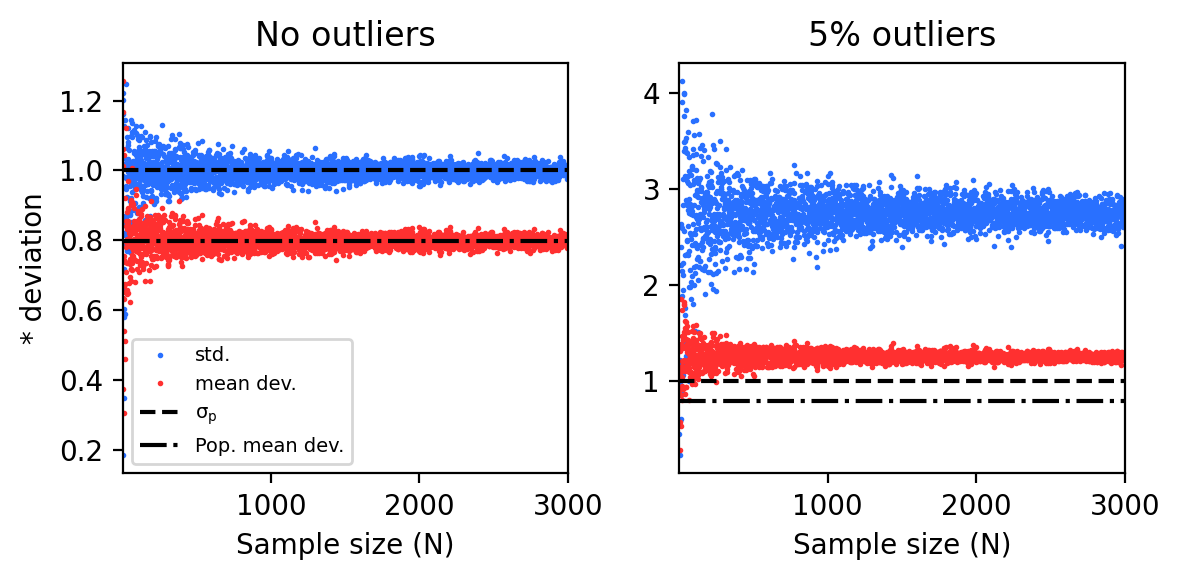

In [2]:
mu_p, sig_p = 0, 1   # standard normal population
md_p = np.sqrt(2 / np.pi)


def mean_dev(sample):
    '''Calculate the mean deviation of a sample.'''
    N = sample.shape[0]
    med_s = np.median(sample)
    
    dist = np.abs(sample - med_s)
    md = dist.sum() / (N - 1)
    
    return md


def get_std_and_md(N, outlier_frac=0.1, outlier_max_sig = 20.):
    '''Get the standard deviation and mean deviation of a sample of size N.'''
    # generate the sample
    n_outliers = int(np.around(outlier_frac * N))
    sample = np.empty(N)
    outlier_range = (mu_p - outlier_max_sig * sig_p, mu_p + outlier_max_sig * sig_p)
    sample[:n_outliers] = np.random.uniform(*outlier_range, size=n_outliers)
    sample[n_outliers:] = np.random.normal(mu_p, sig_p, N - n_outliers)
    
    return sample.std(), mean_dev(sample)


N_range = (2, 3001)
N = np.arange(*N_range)

d_no_outliers = np.array([get_std_and_md(n, outlier_frac=0.0) for n in N])
d_outliers = np.array([get_std_and_md(n, outlier_frac=0.05) for n in N])

fig, ax = plt.subplots(1, 2, figsize=(6, 3), dpi=200)

# no outliers
ax[0].plot(N, d_no_outliers[:, 0], 'o', c='#2970ff', markersize=1, label='std.')
ax[0].plot(N, d_no_outliers[:, 1], 'o', c='#ff3030', markersize=1, label='mean dev.')
ax[0].axhline(sig_p, ls='--', c='k', zorder=2, label=r'$\mathrm{\sigma_p}$')
ax[0].axhline(md_p, ls='-.', c='k', zorder=2, label='Pop. mean dev.')

ax[0].set_title('No outliers')
ax[0].set_xlim(N_range)
ax[0].set_xlabel('Sample size (N)')

ax[0].set_ylabel('* deviation')

# with outliers
ax[1].plot(N, d_outliers[:, 0], 'o', c='#2970ff', markersize=1, label='standard deviation')
ax[1].plot(N, d_outliers[:, 1], 'o', c='#ff3030', markersize=1, label='mean deviation')
ax[1].axhline(sig_p, ls='--', c='k', zorder=2)
ax[1].axhline(md_p, ls='-.', c='k', zorder=2)

ax[1].set_title('5% outliers')
ax[1].set_xlim(N_range)
ax[1].set_xlabel('Sample size (N)')

ax[0].legend(fontsize=7)

plt.tight_layout()
plt.subplots_adjust(wspace=0.25)

plt.show()

In [3]:
def ratio_test(N):
    sample = np.random.normal(mu_p, sig_p, N)
    mu_s = sample.mean()
    return abs(sample - mu_s).mean() / sample.std()

ratio = ratio_test(3000)
print(f'ratio of mean abs. deviation to std. deviation: {ratio:.3f}')

ratio of mean abs. deviation to std. deviation: 0.798


## Problem 2


Imagine a quasar emitting isotropically through space.  You all are X-ray astronomers interested in studying the quasar.  Technology has progressed to the point that each of you can position yourself at the same radius from the quasar at random positions. Each of you has a detector one square centimeter in size.  

Imagine also that technology has progressed to the point that we are all in "mind meld" with the supreme being, who has informed us that the X-ray count rate from the quasar in question is 0.5 counts per second.  

What is the exposure time needed for 80 out of 100 estimates of the count rate to fall between 0.45 and 0.55 counts per second?  

### Answer:

My method in testing this was effectively to simulate 100 estimators, each drawing `exptime` samples from a Poisson distribution and then averaging them to get a count rate estimate. Then the fraction of those estimators whose estimates laid between 0.45 and 0.55 counts per second was then determined. This process was repeated for multiple values of `exptime`, and the resulting plot is shown below. To get the expected exposure time we want, I then look at the exposure times that yielded *exactly* 80/100 estimators in this interval, and then averaged those exposure times.

With this method I determined the exposure time to be used to be about 323.7 $\pm$ 48.7 seconds (on the trial run performed as I write this). This technique I believe gives a reasonable result, but it is hindered by only having 100 estimators, and in this method I am only averaging over exposures that yield exactly 80% of estimators in the interval, instead of a range of ratios (e.g. 75-85%). Regardless, I am able to simulate a good estimate with variance.

I realize I could have also changed the $\lambda$ of the Poisson to be `lam_p * exptime` and only make a single draw per estimator instead of my method, but I am not familiar enough with the Poisson distribution to know if they are equivalent, or if not, which is the proper method.

exptime needed: 323.70588235294116 +- 48.6956510993144


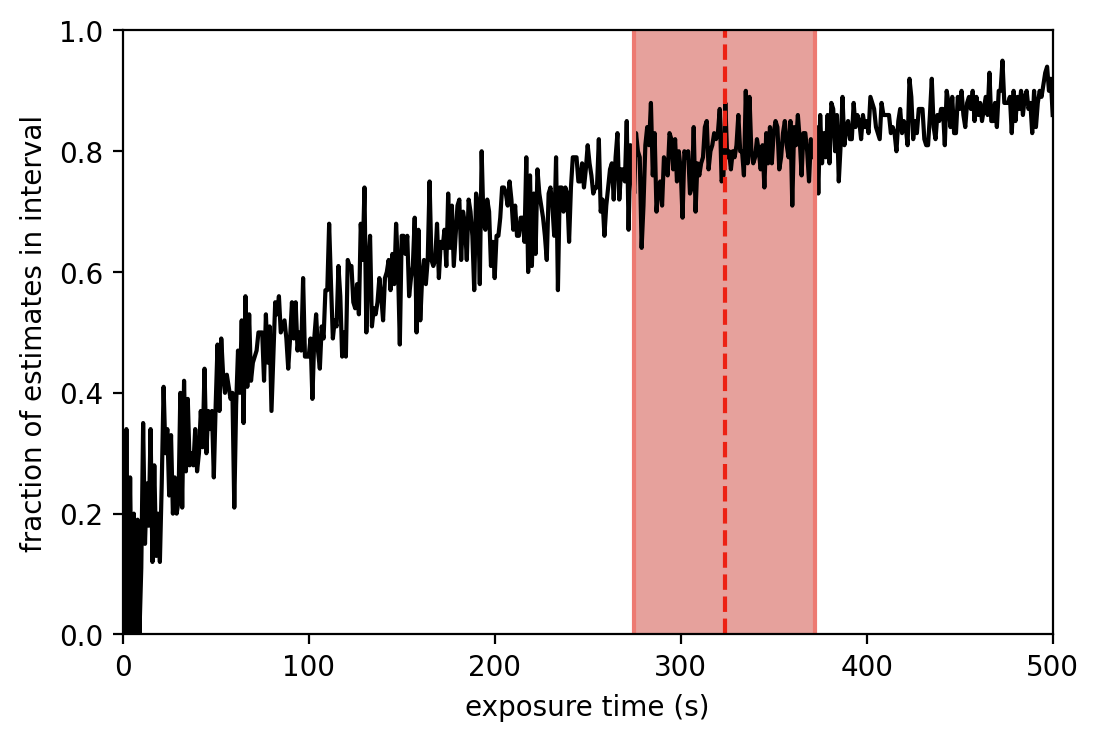

In [4]:
lam_p = 0.5

def get_fraction(exptime, N=100, interval=(0.45, 0.55)):
    '''Get fraction of estimates inside some interval for a given exposure time.'''
    # each estimator takes samples for exptime seconds to get a count rate estimate
    sample = np.random.poisson(lam_p, size=(N, exptime))
    estimates = np.mean(sample, axis=1)

    # get the fraction of estimators in the interval
    mask = (interval[0] < estimates) & (estimates < interval[1])
    ratio = len(estimates[mask]) / N
    
    return ratio

exptime = np.arange(1, 501)
ratios = np.array([get_fraction(exp) for exp in exptime])

mask80 = ratios == 0.8
exptime80 = exptime[mask80]
mu80, std80 = exptime80.mean(), exptime80.std()
print(f'exptime needed: {mu80} +- {std80}')

fig, ax = plt.subplots(dpi=200)

ax.plot(exptime, ratios, 'k-')

lsig = mu80 - std80
rsig = mu80 + std80
ax.axvline(mu80, ls='--', c='#ed2113')
ax.axvline(lsig, ls='-', c='#ed7a72')
ax.axvline(rsig, ls='-', c='#ed7a72')
ax.fill_between([lsig, rsig], 1, color='#e6a19c')

ax.set_xlabel('exposure time (s)')
ax.set_ylabel('fraction of estimates in interval')
ax.set_xlim(0, 500)
ax.set_ylim(0, 1)

plt.show()